In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 358kB 8.7MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 1.0MB 8.4MB/s 
     |████████████████████████████████| 40kB 6.3MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 2.6MB 30.1MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········

In [2]:
from fastbook import *

In [3]:
torch.cuda.device_count()

1

In [4]:
torch.cuda.set_device(0)

In [5]:
!pip install -q git+https://github.com/tmabraham/UPIT.git

     |████████████████████████████████| 983kB 6.6MB/s 
     |████████████████████████████████| 215kB 14.5MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
     |████████████████████████████████| 962kB 27.5MB/s 


In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
!pip uninstall kaggle
!pip install kaggle

In [8]:
!kaggle datasets download -d ianmoone0617/monet-small

 48% 5.00M/10.4M [00:00<00:00, 6.26MB/s]
100% 10.4M/10.4M [00:00<00:00, 12.8MB/s]


In [ ]:
!unzip '/content/monet-small.zip' -d '/content/GAN'

In [44]:
path = Path('/content/GAN')

In [45]:
from fastai.vision.all import *
from fastai.basics import *
from upit.models.cyclegan import *
from upit.train.cyclegan import *
from upit.data.unpaired import *

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
for p in path.ls():
    print(p)

/content/GAN/monet
/content/GAN/photo


In [48]:
photo = path/'photo'
monet = path/'monet'

In [49]:
dls = get_dls(photo, monet, load_size=256,crop_size=128)

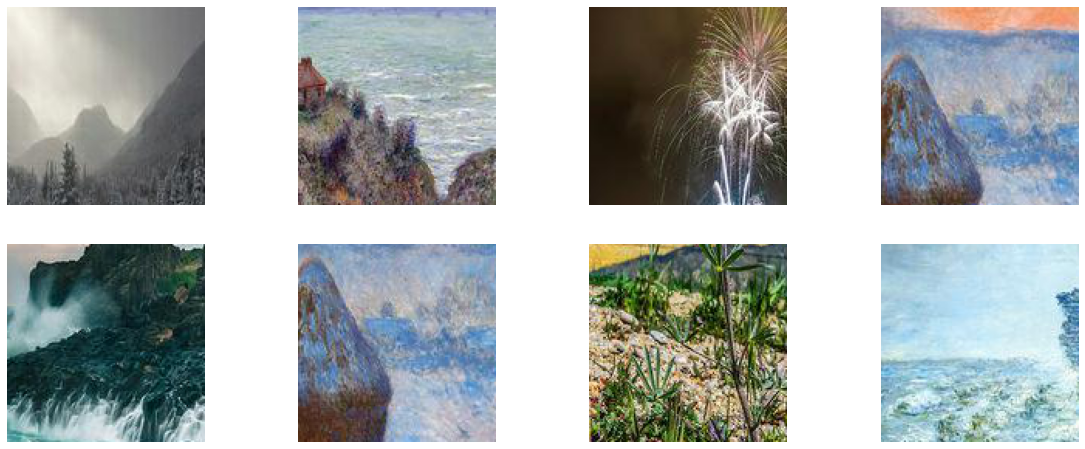

In [ ]:
dls.show_batch(figsize=(20,8))

In [50]:
cycle_gan = CycleGAN(3,3,64, gen_blocks=9)
learn = cycle_learner(dls, cycle_gan,opt_func=partial(Adam,mom=0.5,sqr_mom=0.999))

In [51]:
learn.fit_flat_lin(10,10,2e-4)

epoch,train_loss,id_loss_A,id_loss_B,gen_loss_A,gen_loss_B,cyc_loss_A,cyc_loss_B,D_A_loss,D_B_loss,time
0,11.486592,1.856069,1.682173,0.385249,0.385212,3.860273,3.532710,0.000000,0.000000,00:35
1,10.497807,1.598421,1.427798,0.370385,0.370495,3.442933,3.057421,0.000000,0.000000,00:36
2,10.239126,1.484269,1.455226,0.395115,0.403332,3.270618,3.100639,0.000000,0.000000,00:37
3,9.894331,1.426302,1.332616,0.391774,0.413969,3.228623,2.886867,0.000000,0.000000,00:37
4,9.571760,1.391624,1.276273,0.406415,0.423929,3.066430,2.762928,0.000000,0.000000,00:37
5,9.310444,1.361087,1.247986,0.422643,0.482776,3.017822,2.646978,0.000000,0.000000,00:37
6,9.335819,1.350611,1.268315,0.426618,0.507272,2.956475,2.759934,0.000000,0.000000,00:37
7,8.990047,1.281321,1.215398,0.445704,0.516472,2.802924,2.563298,0.000000,0.000000,00:37
8,9.052750,1.282883,1.250428,0.477559,0.486480,2.833708,2.681338,0.000000,0.000000,00:37
9,8.956264,1.320161,1.202797,0.472185,0.482023,2.904909,2.561968,0.000000,0.000000,00:37


In [52]:
learn.save('photo2monet-100epoch');

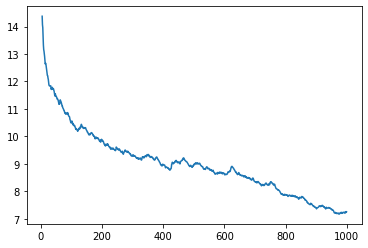

In [53]:
learn.recorder.plot_loss(with_valid=False)

## Let's take one batch see results

In [54]:
b = dls.train.one_batch()
_,_,preds = learn.get_preds(dl=[b], with_decoded=True)

# Original Picture

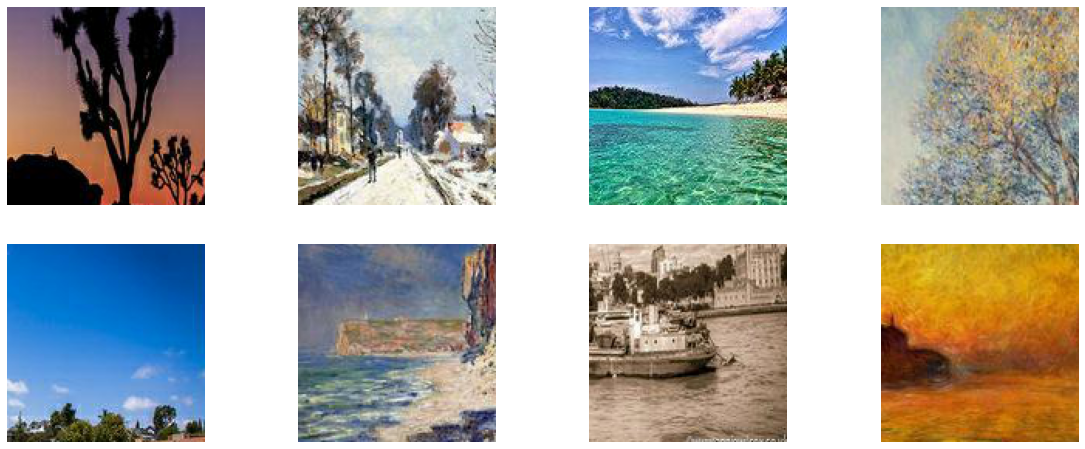

In [58]:
dls.show_batch((b[0], b[1]), max_n=8, show=True,figsize=(20,8))

# Style Transfered

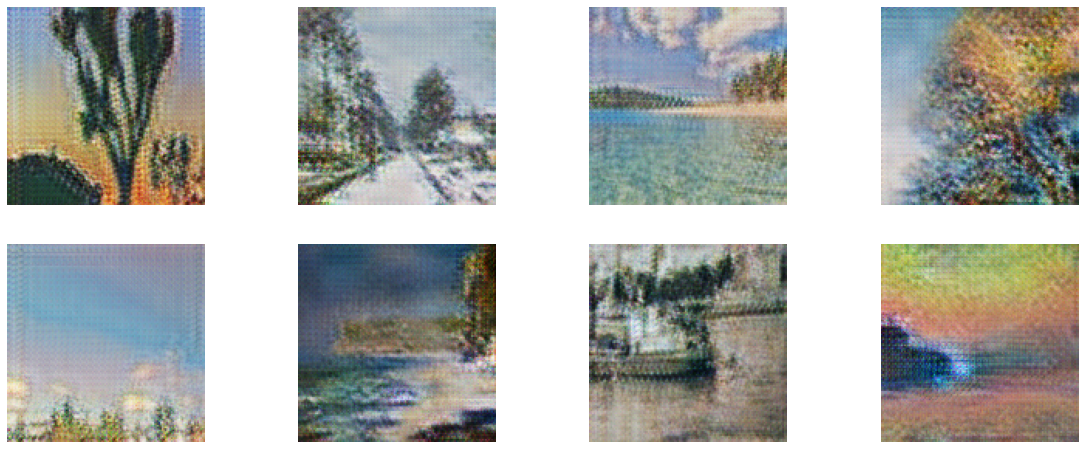

In [59]:
dls.show_batch((preds[1],preds[0]), max_n=8, show=True,figsize=(20,8))